In [64]:
import pandas as pd
import numpy as np

In [65]:
# !pip install --upgrade openpyxl

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
drug = pd.read_csv('/content/drive/MyDrive/Datasets/103BRCADrugs(normalized).csv',index_col=0)
pred_our = pd.read_excel('/content/drive/MyDrive/Datasets/Model3(values)/prediction.xlsx',index_col = 0)

In [68]:
thresh = pd.read_excel('/content/drive/MyDrive/Datasets/103drug_threshold.xlsx',index_col = 0)

**Our Model**

In [69]:
cp = drug.copy()

In [70]:
for i in range(46):
  for j in range(103) :
    if(drug.iloc[i, j] <= thresh.iloc[0, j]):
      cp.iloc[i, j] = 1
    else :
      cp.iloc[i, j] = 0

In [71]:
cp.head()

,Camptothecin,Vinblastine,Cisplatin,Cytarabine,Docetaxel,Gefitinib,Navitoclax,Vorinostat,Nilotinib,Olaparib,...,Pyridostatin,AMG-319,MK-8776,Vinorelbine,VX-11e,LJI308,AZ6102,GSK591,VE821,AT13148
cell_name,,,,,,,,,,,,,,,,,,,,,
AU565,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
BT-20,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
BT-474,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BT-483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BT-549,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0


In [72]:
cp2 = pred_our.copy()

In [73]:
for i in range(46):
  for j in range(103) :
    if(pred_our.iloc[i, j] <= thresh.iloc[0, j]):
      cp2.iloc[i, j] = 1
    else :
      cp2.iloc[i, j] = 0

In [74]:
cp2.head()

,Camptothecin,Vinblastine,Cisplatin,Cytarabine,Docetaxel,Gefitinib,Navitoclax,Vorinostat,Nilotinib,Olaparib,...,Pyridostatin,AMG-319,MK-8776,Vinorelbine,VX-11e,LJI308,AZ6102,GSK591,VE821,AT13148
AU565,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
BT-20,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
BT-474,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BT-483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BT-549,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0


**Malik**

In [75]:
pred_malik = pd.read_excel('/content/drive/MyDrive/Datasets/External Validation/Malik.at.al/Prediction.xlsx', header=None)

In [76]:
pred_malik = pred_malik.T

In [77]:
pred_malik = pred_malik.set_axis(list(pred_our.index))

In [78]:
pred_malik.columns = list(pred_our.columns)

In [79]:
cp3 = pred_malik.copy()

In [80]:
for i in range(46):
  for j in range(103) :
    if(pred_malik.iloc[i, j] <= thresh.iloc[0, j]):
      cp3.iloc[i, j] = 1
    else :
      cp3.iloc[i, j] = 0

In [81]:
cp3.head()

,Camptothecin,Vinblastine,Cisplatin,Cytarabine,Docetaxel,Gefitinib,Navitoclax,Vorinostat,Nilotinib,Olaparib,...,Pyridostatin,AMG-319,MK-8776,Vinorelbine,VX-11e,LJI308,AZ6102,GSK591,VE821,AT13148
AU565,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
BT-20,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
BT-474,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
BT-483,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BT-549,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0


**DeepCDR**

In [82]:
pred_deep = pd.read_excel('/content/drive/MyDrive/Datasets/External Validation/DeepCDR/prediction.xlsx',index_col = 0)

In [83]:
cp4 = pred_deep.copy()

In [84]:
for i in range(46):
  for j in range(103) :
    if(pred_deep.iloc[i, j] <= thresh.iloc[0, j]):
      cp4.iloc[i, j] = 1
    else :
      cp4.iloc[i, j] = 0

In [85]:
cp4.head()

,Camptothecin,Vinblastine,Cisplatin,Cytarabine,Docetaxel,Gefitinib,Navitoclax,Vorinostat,Nilotinib,Olaparib,...,Pyridostatin,AMG-319,MK-8776,Vinorelbine,VX-11e,LJI308,AZ6102,GSK591,VE821,AT13148
AU565,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
BT-20,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
BT-474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BT-483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BT-549,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0


In [86]:
pred_tcnns = pd.read_csv('/content/drive/MyDrive/Datasets/tcNNS-Mod/prediction-mat.csv',index_col = 0)
pred_tcnns = pred_tcnns.sort_index()
pred_tcnns.head()

,Afuresertib,IWP-2,GSK2578215A,XAV939,Staurosporine,CZC24832,Sabutoclax,Olaparib,Crizotinib,AMG-319,...,Erlotinib,Nilotinib,Osimertinib,Buparlisib,NU7441,BMS-345541,Ulixertinib,JQ1,AZD8186,AZD3759
AU565,0.530639,0.552018,0.598712,0.588291,0.458351,0.600814,0.496671,0.593741,0.567367,0.598148,...,0.559997,0.558829,0.529301,0.522166,0.551727,0.576682,0.558996,0.550074,0.552435,0.557743
BT-20,0.545850,0.559741,0.599435,0.591674,0.475892,0.602121,0.512396,0.595883,0.572076,0.599284,...,0.565663,0.563859,0.542874,0.532165,0.561181,0.581277,0.565876,0.560557,0.560622,0.564563
BT-474,0.566138,0.581274,0.624563,0.615282,0.485337,0.627654,0.528726,0.622251,0.594531,0.623994,...,0.587870,0.583326,0.560513,0.547763,0.583111,0.606989,0.588159,0.582282,0.582002,0.585577
BT-483,0.603971,NaN,0.654528,NaN,0.525933,NaN,NaN,0.656132,0.629410,0.652028,...,0.623993,0.617309,0.599989,0.584163,0.622836,NaN,0.624523,0.622794,0.621192,0.621976
BT-549,0.547055,0.564556,0.609802,0.599155,0.471270,0.612076,0.509505,0.607356,0.578637,0.608889,...,0.571922,0.569263,0.543853,0.532133,0.566613,0.590225,0.572031,0.566306,0.565561,0.570947


In [87]:
tcnns_thresh = pd.read_excel('/content/drive/MyDrive/Datasets/drug_threshold-tcnns.xlsx',index_col = 0)
tcnns_thresh = tcnns_thresh.loc[:, tcnns_thresh.columns.isin(list(drug.columns))]

In [88]:
tcnns_thresh

,Afuresertib,GSK2578215A,Staurosporine,Olaparib,Crizotinib,AMG-319,MK-8776,Rapamycin,WEHI-539,Irinotecan,...,Epirubicin,GSK1904529A,UMI-77,Erlotinib,Nilotinib,Osimertinib,Buparlisib,Ulixertinib,AZD8186,AZD3759
0,0.542738,0.624443,0.440775,0.618767,0.583981,0.623295,0.588093,0.44075,0.573911,0.597665,...,0.500438,0.604379,0.571557,0.573772,0.569684,0.537335,0.529871,0.571095,0.569324,0.568779


In [89]:
mean_value = pred_tcnns.mean()

# Replace NaNs in column S2 with the
# mean of values in the same column
pred_tcnns.fillna(value=mean_value, inplace=True)


tc_temp = pred_tcnns.loc[:, pred_tcnns.columns.isin(list(drug.columns))]
tc_temp.head()

,Afuresertib,GSK2578215A,Staurosporine,Olaparib,Crizotinib,AMG-319,MK-8776,Rapamycin,WEHI-539,Irinotecan,...,Epirubicin,GSK1904529A,UMI-77,Erlotinib,Nilotinib,Osimertinib,Buparlisib,Ulixertinib,AZD8186,AZD3759
AU565,0.530639,0.598712,0.458351,0.593741,0.567367,0.598148,0.572945,0.453238,0.550752,0.577671,...,0.495494,0.583728,0.552394,0.559997,0.558829,0.529301,0.522166,0.558996,0.552435,0.557743
BT-20,0.545850,0.599435,0.475892,0.595883,0.572076,0.599284,0.576715,0.474604,0.558104,0.580802,...,0.509604,0.586765,0.561160,0.565663,0.563859,0.542874,0.532165,0.565876,0.560622,0.564563
BT-474,0.566138,0.624563,0.485337,0.622251,0.594531,0.623994,0.600616,0.484257,0.579643,0.605974,...,0.526871,0.607871,0.581823,0.587870,0.583326,0.560513,0.547763,0.588159,0.582002,0.585577
BT-483,0.603971,0.654528,0.525933,0.656132,0.629410,0.652028,0.635896,0.532472,0.616786,0.639402,...,0.564732,0.641519,0.619801,0.623993,0.617309,0.599989,0.584163,0.624523,0.621192,0.621976
BT-549,0.547055,0.609802,0.471270,0.607356,0.578637,0.608889,0.585106,0.465576,0.562481,0.590420,...,0.505645,0.594253,0.566704,0.571922,0.569263,0.543853,0.532133,0.572031,0.565561,0.570947


In [90]:
cp5 = tc_temp.copy()

In [91]:
tccns_drug = pd.read_csv('/content/drive/MyDrive/Datasets/tcNNS-Mod/100tcnns-drug.csv', index_col = 0)
tccns_drug = tccns_drug.sort_index()

tc_drug = tccns_drug.copy()
tccns_drug = tccns_drug[cp5.columns]

tccns_drug.head()

,Afuresertib,GSK2578215A,Staurosporine,Olaparib,Crizotinib,AMG-319,MK-8776,Rapamycin,WEHI-539,Irinotecan,...,Epirubicin,GSK1904529A,UMI-77,Erlotinib,Nilotinib,Osimertinib,Buparlisib,Ulixertinib,AZD8186,AZD3759
AU565,0.533826,0.597189,0.432227,0.611711,0.576032,0.594589,0.551722,0.371394,0.572245,0.561078,...,0.463319,0.564685,0.571207,0.546877,0.545285,0.474817,0.516380,0.571476,0.547413,0.549463
BT-20,0.545825,0.620739,0.452797,0.603595,0.610184,0.621698,0.589646,0.460958,0.586904,0.579174,...,0.508430,0.623841,0.590337,0.565659,0.560482,0.560808,0.520011,0.583554,0.587292,0.556000
BT-474,0.551330,0.658105,0.432730,0.645219,0.619140,0.650942,0.636804,0.460795,0.633510,0.657006,...,0.530198,0.593605,0.651626,0.571126,0.574942,0.496164,0.554292,0.611619,0.587975,0.613228
BT-483,0.635206,0.672477,0.584921,0.674725,0.638880,0.672487,0.671316,0.506721,0.652650,0.665540,...,0.597433,0.633501,0.652060,0.630547,0.598593,0.620180,0.575968,0.618961,0.669037,0.623619
BT-549,0.549783,0.608675,0.390349,0.630515,0.553054,0.624911,0.562229,0.424245,0.601968,0.579125,...,0.480568,0.602795,0.546172,0.603937,0.543747,0.555326,0.537835,0.617288,0.578073,0.588258


In [92]:
cp6 = tccns_drug.copy()

for i in range(46):
  for j in range(100) :
    if(tccns_drug.iloc[i, j] <= tcnns_thresh.iloc[0, j]):
      cp6.iloc[i, j] = 1
    else :
      cp6.iloc[i, j] = 0

In [93]:
for i in range(46):
  for j in range(100) :
    if(tc_temp.iloc[i, j] <= tcnns_thresh.iloc[0, j]):
      cp5.iloc[i, j] = 1
    else :
      cp5.iloc[i, j] = 0

In [94]:
# ACC
from sklearn.metrics import accuracy_score
# F1
from sklearn.metrics import f1_score
# Recall
from sklearn.metrics import recall_score
# Precision -No
# AUC
from sklearn.metrics import roc_auc_score
#

from sklearn.metrics import confusion_matrix

In [95]:
from sklearn.metrics import classification_report
txt = 'AT13148'

In [96]:
agcdr_metric = []
malik_metric = []
deepcdr_metric = []
tcnns_metric = []

metric_index = ['AUC','Accuracy', 'Recall', 'F1-score', 'Specificity', 'NPV']

In [97]:
print('AGCDR')
print(round(roc_auc_score(cp.to_numpy().flatten(), cp2.to_numpy().flatten()), 2))
print(round(accuracy_score(cp.to_numpy().flatten(), cp2.to_numpy().flatten()), 2))
print(round(recall_score(cp.to_numpy().flatten(), cp2.to_numpy().flatten()), 2))
print(round(f1_score(cp.to_numpy().flatten(), cp2.to_numpy().flatten()), 2))
tn1, fp1, fn1, tp1 = confusion_matrix(cp.to_numpy().flatten(), cp2.to_numpy().flatten()).ravel()
print(round(tn1/(fp1 + tn1), 2))
print(round(tn1/(fn1 + tn1), 2))

print('Malik et al.')
print(round(roc_auc_score(cp.to_numpy().flatten(), cp3.to_numpy().flatten()), 2))
print(round(accuracy_score(cp.to_numpy().flatten(), cp3.to_numpy().flatten()), 2))
print(round(recall_score(cp.to_numpy().flatten(), cp3.to_numpy().flatten()), 2))
print(round(f1_score(cp.to_numpy().flatten(), cp3.to_numpy().flatten()), 2))
tn2, fp2, fn2, tp2 = confusion_matrix(cp.to_numpy().flatten(), cp3.to_numpy().flatten()).ravel()
print(round(tn2/(fp2 + tn2), 2))
print(round(tn2/(fn2 + tn2), 2))

print('DeepCDR')
print(round(roc_auc_score(cp.to_numpy().flatten(), cp4.to_numpy().flatten()), 2))
print(round(accuracy_score(cp.to_numpy().flatten(), cp4.to_numpy().flatten()), 2))
print(round(recall_score(cp.to_numpy().flatten(), cp4.to_numpy().flatten()), 2))
print(round(f1_score(cp.to_numpy().flatten(), cp4.to_numpy().flatten()), 2))
tn3, fp3, fn3, tp3 = confusion_matrix(cp.to_numpy().flatten(), cp4.to_numpy().flatten()).ravel()
print(round(tn3/(fp3 + tn3), 2))
print(round(tn3/(fn3 + tn3), 2))

print('tCNNS')
print(round(roc_auc_score(cp6.to_numpy().flatten(), cp5.to_numpy().flatten()), 2))
print(round(accuracy_score(cp6.to_numpy().flatten(), cp5.to_numpy().flatten()), 2))
print(round(recall_score(cp6.to_numpy().flatten(), cp5.to_numpy().flatten()), 2))
print(round(f1_score(cp6.to_numpy().flatten(), cp5.to_numpy().flatten()), 2))
tn4, fp4, fn4, tp4 = confusion_matrix(cp6.to_numpy().flatten(), cp5.to_numpy().flatten()).ravel()
print(round(tn4/(fp4 + tn4), 2))
print(round(tn4/(fn4 + tn4), 2))




AGCDR
0.82
0.82
0.84
0.85
0.81
0.78
Malik et al.
0.71
0.72
0.81
0.77
0.61
0.7
DeepCDR
0.76
0.75
0.72
0.77
0.79
0.68
tCNNS
0.64
0.65
0.73
0.7
0.55
0.63


In [98]:
print('AGCN')
agcdr_metric.append(roc_auc_score(cp.to_numpy().flatten(), cp2.to_numpy().flatten()))
agcdr_metric.append(accuracy_score(cp.to_numpy().flatten(), cp2.to_numpy().flatten()))
agcdr_metric.append(recall_score(cp.to_numpy().flatten(), cp2.to_numpy().flatten()))
agcdr_metric.append(f1_score(cp.to_numpy().flatten(), cp2.to_numpy().flatten()))
tn1, fp1, fn1, tp1 = confusion_matrix(cp.to_numpy().flatten(), cp2.to_numpy().flatten()).ravel()
agcdr_metric.append(tn1/(fp1 + tn1))
agcdr_metric.append(tn1/(fn1 + tn1))

print('Malik et al.')
malik_metric.append(roc_auc_score(cp.to_numpy().flatten(), cp3.to_numpy().flatten()))
malik_metric.append(accuracy_score(cp.to_numpy().flatten(), cp3.to_numpy().flatten()))
malik_metric.append(recall_score(cp.to_numpy().flatten(), cp3.to_numpy().flatten()))
malik_metric.append(f1_score(cp.to_numpy().flatten(), cp3.to_numpy().flatten()))
tn2, fp2, fn2, tp2 = confusion_matrix(cp.to_numpy().flatten(), cp3.to_numpy().flatten()).ravel()
malik_metric.append(tn2/(fp2 + tn2))
malik_metric.append(tn2/(fn2 + tn2))

print('DeepCDR')
deepcdr_metric.append(roc_auc_score(cp.to_numpy().flatten(), cp4.to_numpy().flatten()))
deepcdr_metric.append(accuracy_score(cp.to_numpy().flatten(), cp4.to_numpy().flatten()))
deepcdr_metric.append(recall_score(cp.to_numpy().flatten(), cp4.to_numpy().flatten()))
deepcdr_metric.append(f1_score(cp.to_numpy().flatten(), cp4.to_numpy().flatten()))
tn3, fp3, fn3, tp3 = confusion_matrix(cp.to_numpy().flatten(), cp4.to_numpy().flatten()).ravel()
deepcdr_metric.append(tn3/(fp3 + tn3))
deepcdr_metric.append(tn3/(fn3 + tn3))

print('tCNNS')
tcnns_metric.append(roc_auc_score(cp6.to_numpy().flatten(), cp5.to_numpy().flatten()))
tcnns_metric.append(accuracy_score(cp6.to_numpy().flatten(), cp5.to_numpy().flatten()))
tcnns_metric.append(recall_score(cp6.to_numpy().flatten(), cp5.to_numpy().flatten()))
tcnns_metric.append(f1_score(cp6.to_numpy().flatten(), cp5.to_numpy().flatten()))
tn4, fp4, fn4, tp4 = confusion_matrix(cp6.to_numpy().flatten(), cp5.to_numpy().flatten()).ravel()
tcnns_metric.append(tn4/(fp4 + tn4))
tcnns_metric.append(tn4/(fn4 + tn4))

AGCN
Malik et al.
DeepCDR
tCNNS


In [99]:
import matplotlib.pyplot as plt


<Figure size 640x480 with 0 Axes>

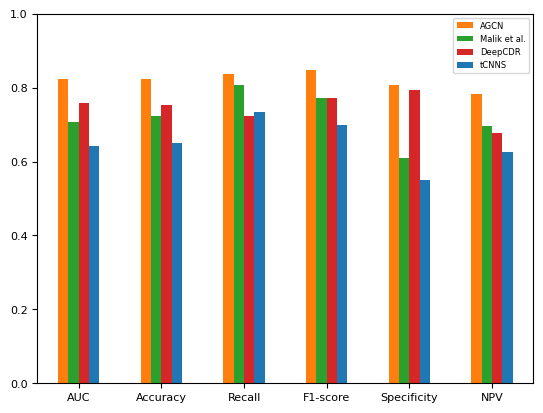

In [100]:
 # using a size in points
# plt.legend(fontsize="x-large") # using a named size
plt.figure()
plt.rcParams.update({'font.size': 4})

metric_df = pd.DataFrame({
    'AGCN': agcdr_metric,
    'Malik et al.': malik_metric,
    'DeepCDR': deepcdr_metric,
    'tCNNS' : tcnns_metric

    },
     index=metric_index)
ax = metric_df.plot.bar(rot=0, color={'AGCN': 'tab:orange',
    'Malik et al.': 'tab:green',
    'DeepCDR': 'tab:red',
    'tCNNS' : 'tab:blue'}, fontsize=8)
ax.set_ylim(0, 1.0)
ax.legend(loc=1,fontsize=6)
plt.savefig('filename.png', dpi=300)

In [101]:
target_names = ['Resistant', 'Sensitive']
print(classification_report(cp[txt], cp2[txt], target_names=target_names))

              precision    recall  f1-score   support

   Resistant       0.85      0.73      0.79        15
   Sensitive       0.88      0.94      0.91        31

    accuracy                           0.87        46
   macro avg       0.86      0.83      0.85        46
weighted avg       0.87      0.87      0.87        46



In [102]:
#finding R2 and Rp

In [103]:
from sklearn.metrics import r2_score

print(r2_score(cp, cp2))
print(r2_score(cp, cp3))
print(r2_score(cp, cp4))
print(r2_score(cp6, cp5))


# print(r2_score(cp[drug], cp2[drug]))
# print(r2_score(cp[drug], cp3[drug]))
# print(r2_score(cp[drug], cp4[drug]))
# print(r2_score(cp[drug], cp5[drug]))

0.1478520316516911
-0.3481043941656781
-0.2037141966646811
-0.4334480199276517


In [105]:
from scipy.stats import spearmanr


corr, _ = spearmanr(drug.to_numpy().flatten(), pred_our.to_numpy().flatten())
print(corr)
corr, _ = spearmanr(drug.to_numpy().flatten(), pred_malik.to_numpy().flatten())
print(corr)
corr, _ = spearmanr(drug.to_numpy().flatten(), pred_deep.to_numpy().flatten())
print(corr)
corr, _ = spearmanr(tc_drug.to_numpy().flatten(), pred_tcnns.to_numpy().flatten())
print(corr)

0.8372238611315554
0.6155569844600295
0.686622486497558
0.8717840348948837


In [106]:
comparison_list = []

In [107]:
comparison_table = pd.DataFrame(columns = ['Drug Name', 'Method', ''])

In [108]:
txt = 'AT13148'

for drug in cp5.columns:
  # compare_drug = []
  # compare_drug.append(drug)
  # compare_drug.append('AGCDR')
  # compare_drug.append(roc_auc_score(cp[drug], cp2[drug]))
  # compare_drug.append(accuracy_score(cp[drug], cp2[drug]))
  # compare_drug.append(recall_score(cp[drug], cp2[drug]))
  # compare_drug.append(f1_score(cp[drug], cp2[drug]))
  # comparison_list.append(compare_drug)


  # compare_drug = []
  # compare_drug.append(drug)
  # compare_drug.append('Malik et al.')
  # compare_drug.append(roc_auc_score(cp[drug], cp3[drug]))
  # compare_drug.append(accuracy_score(cp[drug], cp3[drug]))
  # compare_drug.append(recall_score(cp[drug], cp3[drug]))
  # compare_drug.append(f1_score(cp[drug], cp3[drug]))
  # comparison_list.append(compare_drug)

  # compare_drug = []
  # compare_drug.append(drug)
  # compare_drug.append('DeepCDR')
  # compare_drug.append(roc_auc_score(cp[drug], cp4[drug]))
  # compare_drug.append(accuracy_score(cp[drug], cp4[drug]))
  # compare_drug.append(recall_score(cp[drug], cp4[drug]))
  # compare_drug.append(f1_score(cp[drug], cp4[drug]))
  # comparison_list.append(compare_drug)

  compare_drug = []
  compare_drug.append(drug)
  compare_drug.append('tCNNS')
  compare_drug.append(roc_auc_score(cp6[drug], cp5[drug]))
  compare_drug.append(accuracy_score(cp6[drug], cp5[drug]))
  compare_drug.append(recall_score(cp6[drug], cp5[drug]))
  compare_drug.append(f1_score(cp6[drug], cp5[drug]))
  comparison_list.append(compare_drug)

In [109]:
compable = pd.DataFrame(comparison_list)

In [47]:
#compable.to_csv('/content/drive/MyDrive/Datasets/Table/comparison_table_tcnns.csv')

**Comparing Models**

In [110]:
our = 0
malik = 0
deep = 0
tcnns = 0


In [111]:
for x in cp.columns :
  i = accuracy_score(cp[x], cp2[x])
  j = accuracy_score(cp[x], cp3[x])
  k = accuracy_score(cp[x], cp4[x])

  if(i > j) :
    if(i > k) :
      our = our + 1
    else :
      deep = deep + 1
  else :
    if(j >= k) :
      malik = malik + 1
    else :
      deep = deep + 1

In [112]:
print (our,malik,deep)

75 13 15


In [113]:
import matplotlib.pyplot as plt

In [115]:
cp_100 = cp[cp5.columns]
cp2_100 = cp2[cp5.columns]
cp3_100 = cp3[cp5.columns]
cp4_100 = cp4[cp5.columns]
cp6_100 = cp6[cp5.columns]

In [116]:
cp6

,Afuresertib,GSK2578215A,Staurosporine,Olaparib,Crizotinib,AMG-319,MK-8776,Rapamycin,WEHI-539,Irinotecan,...,Epirubicin,GSK1904529A,UMI-77,Erlotinib,Nilotinib,Osimertinib,Buparlisib,Ulixertinib,AZD8186,AZD3759
AU565,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
BT-20,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
BT-474,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
BT-483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BT-549,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
CAL-120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CAL-148,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
CAL-51,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
CAL-85-1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
CAMA-1,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0


In [117]:
model_accuracy = (cp_100==cp2_100)

In [118]:
accuracy = (model_accuracy.sum().sum()/(46*100))*100

In [119]:
accuracy

82.56521739130434

In [120]:
model_accuracy2 = (cp_100 == cp3_100)
accuracy2 = (model_accuracy2.sum().sum()/(46*100))*100

In [121]:
accuracy2

72.54347826086956

In [122]:
model_accuracy3 = (cp_100 == cp4_100)
accuracy3 = (model_accuracy3.sum().sum()/(46*100))*100

In [123]:
accuracy3

75.32608695652175

In [124]:
cp6

,Afuresertib,GSK2578215A,Staurosporine,Olaparib,Crizotinib,AMG-319,MK-8776,Rapamycin,WEHI-539,Irinotecan,...,Epirubicin,GSK1904529A,UMI-77,Erlotinib,Nilotinib,Osimertinib,Buparlisib,Ulixertinib,AZD8186,AZD3759
AU565,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
BT-20,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
BT-474,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
BT-483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BT-549,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
CAL-120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CAL-148,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
CAL-51,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
CAL-85-1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
CAMA-1,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0


In [125]:
model_accuracy4 = (cp6 == cp5)
accuracy4 = (model_accuracy4.sum().sum()/(46*100))*100

In [126]:
accuracy4

65.1086956521739

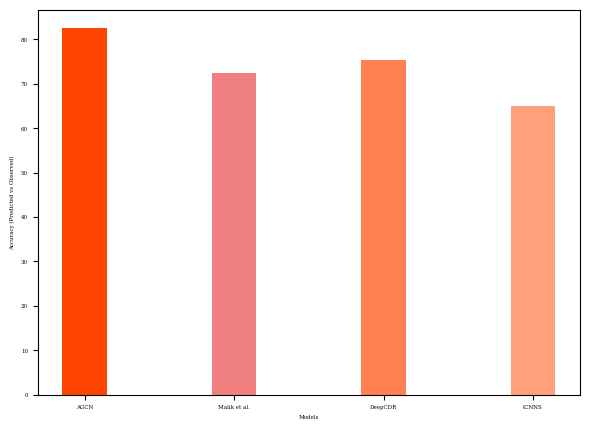

In [127]:
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

courses = ['AGCN', 'Malik et al.', 'DeepCDR', 'tCNNS']
values = [accuracy, accuracy2, accuracy3, accuracy4]

fig = plt.figure(figsize = (7, 5))
c = ['orangered', 'lightcoral', 'coral', 'lightsalmon']
plt.bar(courses, values, color = c, width = 0.3)

plt.xlabel("Models")
plt.ylabel("Accuracy (Predicted vs Observed)")
# for index, value in enumerate(courses):
#     plt.text(value, index,
#              str(values))

plt.savefig('filename.png', dpi=300)
plt.show()

In [128]:
fpr_our_list = []
fpr_malik_list = []
fpr_deepcdr_list = []
fpr_tcnns_list = []

In [129]:
from sklearn.metrics import confusion_matrix

In [130]:
for i in cp5.columns:
  tn1, fp1, fn1, tp1 = confusion_matrix(cp[i], cp2[i],).ravel()
  fpr_our_list.append(fp1/(fp1 + tn1))
  tn2, fp2, fn2, tp2 = confusion_matrix(cp[i], cp3[i],).ravel()
  fpr_malik_list.append(fp2/(fp2 + tn2))
  tn3, fp3, fn3, tp3 = confusion_matrix(cp[i], cp4[i],).ravel()
  fpr_deepcdr_list.append(fp3/(fp3 + tn3))
  tn4, fp4, fn4, tp4 = confusion_matrix(cp6[i], cp5[i],).ravel()
  fpr_tcnns_list.append(fp4/(fp4 + tn4))

In [131]:
fpr_list = pd.DataFrame(
    {'AGCN': fpr_our_list,
     'Malik et al.': fpr_malik_list,
     'DeepCDR' : fpr_deepcdr_list,
     'tCNNS' : fpr_tcnns_list
    })

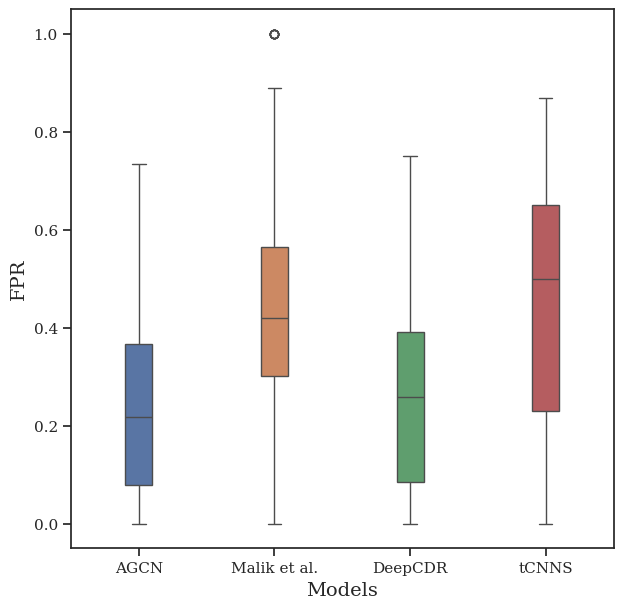

In [132]:
import seaborn as sns


sns.set_theme(style="whitegrid")
sns.set_style("ticks")
sns.set_style({'font.family':'DeJavu Serif', 'font.serif':['Times New Roman']})
plt.figure(figsize = (7,7))
ax = sns.boxplot(data = fpr_list, width = 0.2)
ax.set_xlabel("Models", fontsize = 14)
ax.set_ylabel("FPR", fontsize = 14)
plt.savefig('filename.png', dpi=300)


In [133]:
### Finding R2 and Rp values